In [ ]:
# ============================================
# Step 7: Cluster Profiling & Interpretation
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 시각화 설정
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 60)
print("Step 7: 클러스터 프로파일링 및 해석")
print("=" * 60)

Step 7: 클러스터 프로파일링 및 해석


In [ ]:
# --------------------------------------------
# 7.0 데이터 로드
# --------------------------------------------

# clustered_data.csv 로드
clustered_data = pd.read_csv('/content/drive/MyDrive/개인프로젝트 영상/데이터분석_머신러닝/data/HierachicalClustering_과제_data/clustered_data.csv')

print(f"\n✅ 데이터 로드 완료!")
print(f"   총 고객 수: {len(clustered_data):,}")
print(f"   특성 수: {len(clustered_data.columns) - 1}개")
print(f"   클러스터 수: {clustered_data['cluster'].nunique()}개")

# 클러스터별 고객 수
print("\n📊 클러스터별 고객 분포:")
cluster_dist = clustered_data['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_dist.items():
    percentage = (count / len(clustered_data)) * 100
    print(f"   Cluster {cluster_id}: {count:,}명 ({percentage:.1f}%)")


✅ 데이터 로드 완료!
   총 고객 수: 25,000
   특성 수: 39개
   클러스터 수: 7개

📊 클러스터별 고객 분포:
   Cluster 1: 742명 (3.0%)
   Cluster 2: 769명 (3.1%)
   Cluster 3: 159명 (0.6%)
   Cluster 4: 6,329명 (25.3%)
   Cluster 5: 2,125명 (8.5%)
   Cluster 6: 9,703명 (38.8%)
   Cluster 7: 5,173명 (20.7%)


In [ ]:
# --------------------------------------------
# 7.1 클러스터별 주요 특성 비교
# --------------------------------------------

print("\n" + "=" * 60)
print("7.1 클러스터별 주요 특성 비교")
print("=" * 60)

# 주요 특성 선택
key_features = [
    'recency', 'frequency', 'monetary',
    'avg_order_value', 'total_items', 'items_per_order',
    'total_categories', 'avg_review_score',
    'avg_installments', 'credit_card_usage_ratio'
]

# 실제 존재하는 특성만 필터링
key_features = [f for f in key_features if f in clustered_data.columns]

# 클러스터별 평균값 계산
cluster_profiles = clustered_data.groupby('cluster')[key_features].mean()

print("\n📊 클러스터별 평균값:")
print(cluster_profiles.round(2))


7.1 클러스터별 주요 특성 비교

📊 클러스터별 평균값:
         recency  frequency  monetary  avg_order_value  total_items  \
cluster                                                               
1         225.95       2.05    314.21           147.11         2.44   
2         248.72       1.00    993.04           973.66         1.20   
3         261.72       1.01    197.17           188.58         1.21   
4         238.92       1.00    132.20           130.19         1.00   
5         236.78       1.00    214.01           210.38         2.41   
6         233.09       1.00    125.27           123.32         1.01   
7         241.92       1.00    116.67           113.37         1.01   

         items_per_order  total_categories  avg_review_score  \
cluster                                                        
1                   1.19              1.59              4.19   
2                   1.20              1.00              4.16   
3                   1.19              1.01              0.00   
4     

In [ ]:
# 클러스터별 중앙값도 계산 (이상치 영향 적음)
cluster_profiles_median = clustered_data.groupby('cluster')[key_features].median()

print("\n📊 클러스터별 중앙값:")
print(cluster_profiles_median.round(2))


📊 클러스터별 중앙값:
         recency  frequency  monetary  avg_order_value  total_items  \
cluster                                                               
1          209.0        2.0    229.53           110.64          2.0   
2          224.0        1.0    816.01           810.52          1.0   
3          261.0        1.0    117.90           115.39          1.0   
4          216.0        1.0    102.85           100.62          1.0   
5          217.0        1.0    165.06           163.88          2.0   
6          215.0        1.0     99.57            98.12          1.0   
7          225.0        1.0     85.14            82.61          1.0   

         items_per_order  total_categories  avg_review_score  \
cluster                                                        
1                    1.0               2.0              4.67   
2                    1.0               1.0              5.00   
3                    1.0               1.0              0.00   
4                    1.0  


7.2 클러스터 특성 히트맵


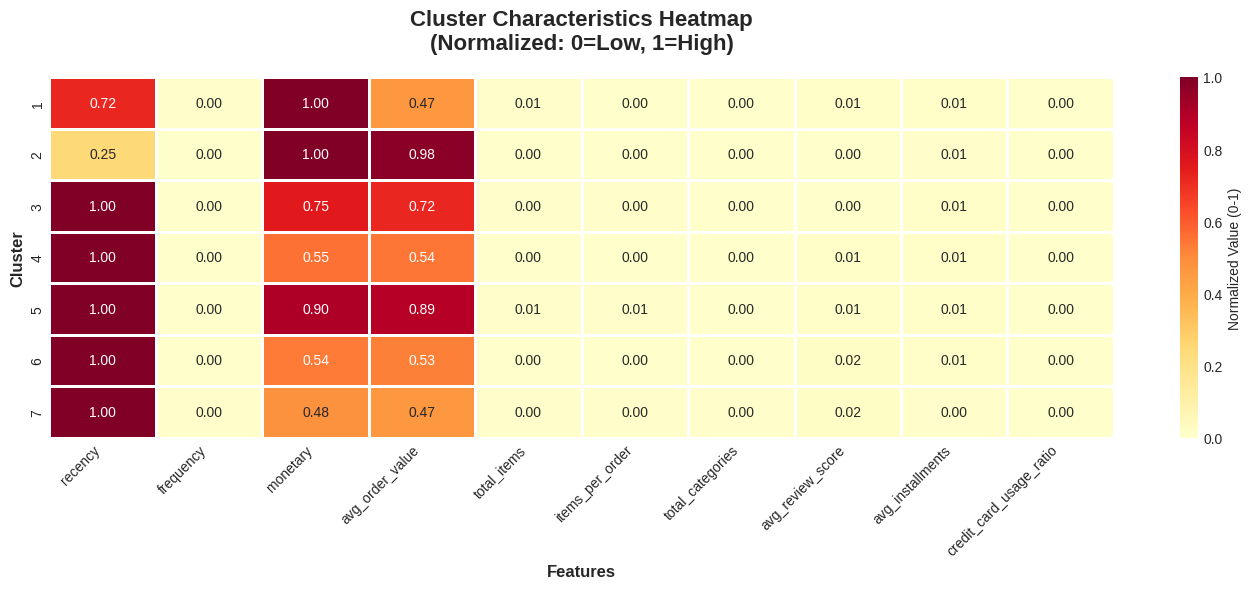


💡 히트맵 해석:
   - 빨간색(1에 가까움): 해당 특성이 높음
   - 노란색(0에 가까움): 해당 특성이 낮음
   - 각 클러스터의 '색깔 패턴'이 고유한 특성


In [ ]:
# --------------------------------------------
# 7.2 클러스터 특성 시각화 1: Heatmap
# --------------------------------------------

print("\n" + "=" * 60)
print("7.2 클러스터 특성 히트맵")
print("=" * 60)

# 정규화 (0-1 스케일로 변환)하여 비교하기 쉽게
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cluster_profiles_normalized = pd.DataFrame(
    scaler.fit_transform(cluster_profiles.T).T,
    index=cluster_profiles.index,
    columns=cluster_profiles.columns
)

# 히트맵
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_profiles_normalized, annot=True, fmt='.2f', cmap='YlOrRd',
            cbar_kws={'label': 'Normalized Value (0-1)'}, linewidths=1, linecolor='white')
plt.title('Cluster Characteristics Heatmap\n(Normalized: 0=Low, 1=High)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Cluster', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n💡 히트맵 해석:")
print("   - 빨간색(1에 가까움): 해당 특성이 높음")
print("   - 노란색(0에 가까움): 해당 특성이 낮음")
print("   - 각 클러스터의 '색깔 패턴'이 고유한 특성")


7.3 클러스터 특성 레이더 차트


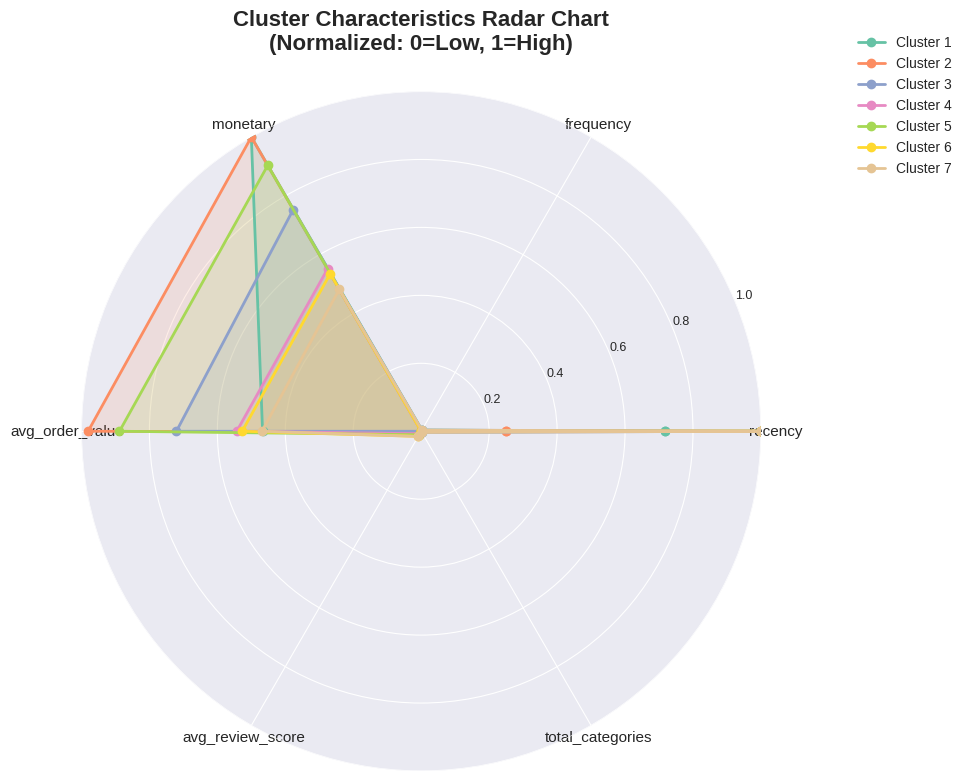


💡 레이더 차트 해석:
   - 각 클러스터의 '모양'이 고유한 고객 프로필
   - 바깥쪽에 가까울수록 해당 특성이 높음


In [ ]:
# --------------------------------------------
# 7.3 클러스터 특성 시각화 2: Radar Chart
# --------------------------------------------

print("\n" + "=" * 60)
print("7.3 클러스터 특성 레이더 차트")
print("=" * 60)

# 레이더 차트용 주요 특성 선택 (너무 많으면 복잡)
radar_features = [
    'recency', 'frequency', 'monetary',
    'avg_order_value', 'avg_review_score', 'total_categories'
]
radar_features = [f for f in radar_features if f in clustered_data.columns]

# 정규화된 데이터
radar_data = cluster_profiles_normalized[radar_features]

# 레이더 차트 그리기
from math import pi

num_clusters = len(radar_data)
num_features = len(radar_features)

# 각도 계산
angles = [n / float(num_features) * 2 * pi for n in range(num_features)]
angles += angles[:1]  # 닫힌 도형 만들기

# 색상
colors = plt.cm.Set2(range(num_clusters))

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for idx, (cluster_id, values) in enumerate(radar_data.iterrows()):
    values_list = values.tolist()
    values_list += values_list[:1]  # 닫힌 도형

    ax.plot(angles, values_list, 'o-', linewidth=2, label=f'Cluster {cluster_id}', color=colors[idx])
    ax.fill(angles, values_list, alpha=0.15, color=colors[idx])

# 레이블
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_features, size=11)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], size=9)
ax.grid(True)

plt.title('Cluster Characteristics Radar Chart\n(Normalized: 0=Low, 1=High)',
          fontsize=16, fontweight='bold', pad=30)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

print("\n💡 레이더 차트 해석:")
print("   - 각 클러스터의 '모양'이 고유한 고객 프로필")
print("   - 바깥쪽에 가까울수록 해당 특성이 높음")


7.4 주요 특성별 분포 비교 (Box Plot)


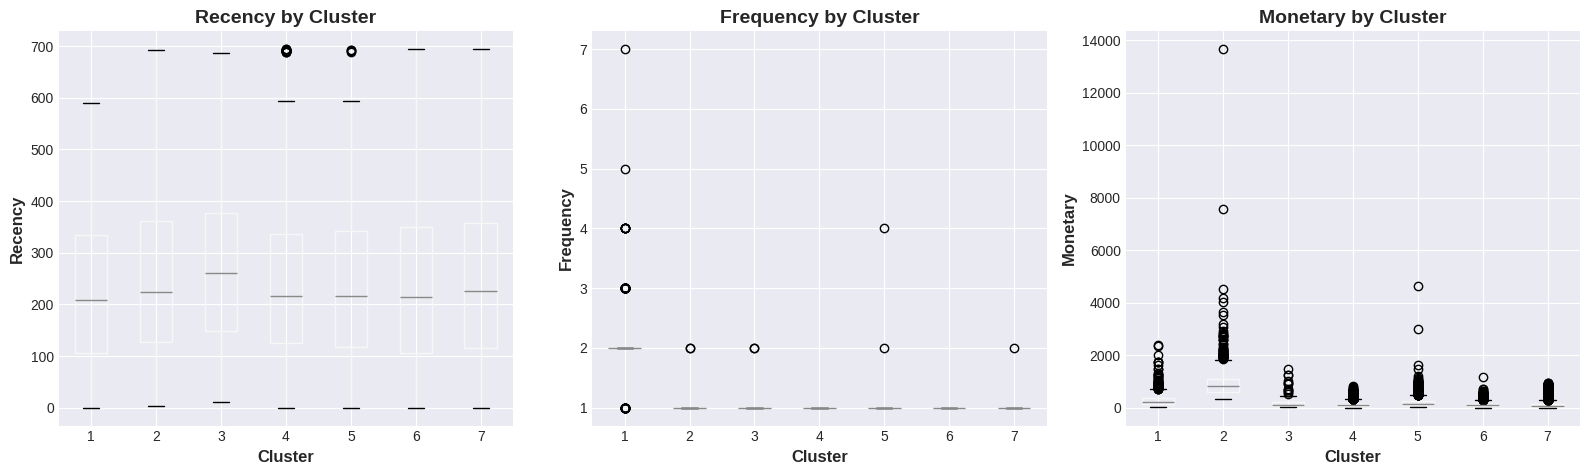

In [ ]:
# --------------------------------------------
# 7.4 주요 특성별 Box Plot 비교
# --------------------------------------------

print("\n" + "=" * 60)
print("7.4 주요 특성별 분포 비교 (Box Plot)")
print("=" * 60)

# RFM 특성
rfm_features = ['recency', 'frequency', 'monetary']
rfm_features = [f for f in rfm_features if f in clustered_data.columns]

fig, axes = plt.subplots(1, len(rfm_features), figsize=(16, 5))

for idx, feature in enumerate(rfm_features):
    clustered_data.boxplot(column=feature, by='cluster', ax=axes[idx])
    axes[idx].set_xlabel('Cluster', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature.capitalize(), fontsize=12, fontweight='bold')
    axes[idx].set_title(f'{feature.capitalize()} by Cluster', fontsize=14, fontweight='bold')
    axes[idx].get_figure().suptitle('')  # 기본 제목 제거

plt.tight_layout()
plt.show()

In [ ]:
# --------------------------------------------
# 7.5 클러스터 특성 상세 분석
# --------------------------------------------

print("\n" + "=" * 60)
print("7.5 클러스터별 상세 특성 분석")
print("=" * 60)

# 각 클러스터별로 특징적인 값 추출
for cluster_id in sorted(clustered_data['cluster'].unique()):
    cluster_subset = clustered_data[clustered_data['cluster'] == cluster_id]

    print(f"\n{'='*60}")
    print(f"Cluster {cluster_id} 상세 분석")
    print(f"{'='*60}")

    print(f"\n📊 기본 정보:")
    print(f"   고객 수: {len(cluster_subset):,}명 ({len(cluster_subset)/len(clustered_data)*100:.1f}%)")

    print(f"\n💰 RFM 특성:")
    print(f"   Recency (평균): {cluster_subset['recency'].mean():.1f}일")
    print(f"   Frequency (평균): {cluster_subset['frequency'].mean():.2f}회")
    print(f"   Monetary (평균): R$ {cluster_subset['monetary'].mean():.2f}")
    print(f"   Monetary (중앙값): R$ {cluster_subset['monetary'].median():.2f}")

    if 'avg_order_value' in cluster_subset.columns:
        print(f"\n🛒 구매 패턴:")
        print(f"   평균 주문 금액: R$ {cluster_subset['avg_order_value'].mean():.2f}")
        print(f"   주문당 평균 아이템: {cluster_subset['items_per_order'].mean():.2f}개")
        print(f"   구매 카테고리 수: {cluster_subset['total_categories'].mean():.2f}개")

    if 'avg_review_score' in cluster_subset.columns:
        print(f"\n⭐ 만족도:")
        print(f"   평균 리뷰 점수: {cluster_subset['avg_review_score'].mean():.2f}점")

        # 만족도 분포
        if 'satisfaction_category' in cluster_subset.columns:
            satisfaction_dist = cluster_subset['satisfaction_category'].value_counts()
            print(f"   만족도 분포:")
            for category, count in satisfaction_dist.items():
                print(f"      - {category}: {count}명 ({count/len(cluster_subset)*100:.1f}%)")

    if 'avg_installments' in cluster_subset.columns:
        print(f"\n💳 결제 특성:")
        print(f"   평균 할부 개월: {cluster_subset['avg_installments'].mean():.1f}개월")
        print(f"   신용카드 사용 비율: {cluster_subset['credit_card_usage_ratio'].mean()*100:.1f}%")

        if 'payment_type_most_common' in cluster_subset.columns:
            payment_dist = cluster_subset['payment_type_most_common'].value_counts().head(3)
            print(f"   선호 결제 방식 (상위 3개):")
            for payment_type, count in payment_dist.items():
                print(f"      - {payment_type}: {count}명 ({count/len(cluster_subset)*100:.1f}%)")


7.5 클러스터별 상세 특성 분석

Cluster 1 상세 분석

📊 기본 정보:
   고객 수: 742명 (3.0%)

💰 RFM 특성:
   Recency (평균): 226.0일
   Frequency (평균): 2.05회
   Monetary (평균): R$ 314.21
   Monetary (중앙값): R$ 229.53

🛒 구매 패턴:
   평균 주문 금액: R$ 147.11
   주문당 평균 아이템: 1.19개
   구매 카테고리 수: 1.59개

⭐ 만족도:
   평균 리뷰 점수: 4.19점
   만족도 분포:
      - very_satisfied: 447명 (60.2%)
      - satisfied: 154명 (20.8%)
      - neutral: 83명 (11.2%)
      - dissatisfied: 58명 (7.8%)

💳 결제 특성:
   평균 할부 개월: 3.3개월
   신용카드 사용 비율: 75.3%
   선호 결제 방식 (상위 3개):
      - credit_card: 555명 (74.8%)
      - boleto: 160명 (21.6%)
      - voucher: 22명 (3.0%)

Cluster 2 상세 분석

📊 기본 정보:
   고객 수: 769명 (3.1%)

💰 RFM 특성:
   Recency (평균): 248.7일
   Frequency (평균): 1.00회
   Monetary (평균): R$ 993.04
   Monetary (중앙값): R$ 816.01

🛒 구매 패턴:
   평균 주문 금액: R$ 973.66
   주문당 평균 아이템: 1.20개
   구매 카테고리 수: 1.00개

⭐ 만족도:
   평균 리뷰 점수: 4.16점
   만족도 분포:
      - very_satisfied: 466명 (60.6%)
      - satisfied: 147명 (19.1%)
      - dissatisfied: 106명 (13.8%)
      - neutral: 50명 (6.5%)



In [ ]:
# --------------------------------------------
# 7.6 클러스터 간 통계적 차이 검증
# --------------------------------------------

print("\n" + "=" * 60)
print("7.6 클러스터 간 통계적 유의성 검증")
print("=" * 60)

# ANOVA 테스트 (클러스터 간 차이가 통계적으로 유의한지)# ANOVA(Analysis of Variance, 분산분석)는 세 개 이상의 그룹 평균들 사이에 통계적으로 유의미한 차이가 있는지 검증하는 통계 기법
print("\n📊 ANOVA Test (클러스터 간 차이 검증):")

for feature in key_features[:5]:  # 주요 특성 5개만
    groups = [clustered_data[clustered_data['cluster'] == c][feature].values
              for c in sorted(clustered_data['cluster'].unique())]

    f_stat, p_value = stats.f_oneway(*groups)

    significance = "✅ 유의함" if p_value < 0.05 else "❌ 유의하지 않음"
    print(f"   {feature}: F={f_stat:.2f}, p-value={p_value:.4f} → {significance}")

print("\n💡 해석:")
print("   p-value < 0.05 → 클러스터 간 차이가 통계적으로 유의")
print("   p-value >= 0.05 → 우연히 생긴 차이일 수 있음")


7.6 클러스터 간 통계적 유의성 검증

📊 ANOVA Test (클러스터 간 차이 검증):
   recency: F=4.20, p-value=0.0003 → ✅ 유의함
   frequency: F=21940.70, p-value=0.0000 → ✅ 유의함
   monetary: F=3133.26, p-value=0.0000 → ✅ 유의함
   avg_order_value: F=3487.64, p-value=0.0000 → ✅ 유의함
   total_items: F=5131.78, p-value=0.0000 → ✅ 유의함

💡 해석:
   p-value < 0.05 → 클러스터 간 차이가 통계적으로 유의
   p-value >= 0.05 → 우연히 생긴 차이일 수 있음


In [ ]:
# --------------------------------------------
# 7.7 클러스터 명명 (Naming)
# --------------------------------------------

print("\n" + "=" * 60)
print("7.7 클러스터에 의미 있는 이름 붙이기")
print("=" * 60)

print("""
💡 각 클러스터의 특성을 종합하여 이름을 붙여봅시다!

예시:
- 높은 monetary + 높은 frequency + 높은 만족도 → "VIP 고객"
- 높은 monetary + 낮은 frequency + 높은 만족도 → "잠재 고객"
- 낮은 monetary + 높은 할부 + 단일 카테고리 → "가성비 고객"
- 낮은 만족도 → "불만족/이탈 위험 고객"

위의 분석 결과를 바탕으로:
""")

# 클러스터별 프로필 요약 (자동)
cluster_names = {}

for cluster_id in sorted(clustered_data['cluster'].unique()):
    cluster_subset = clustered_data[clustered_data['cluster'] == cluster_id]

    # 특성 추출
    avg_monetary = cluster_subset['monetary'].mean()
    avg_frequency = cluster_subset['frequency'].mean()
    avg_review = cluster_subset['avg_review_score'].mean() if 'avg_review_score' in cluster_subset.columns else 0
    avg_recency = cluster_subset['recency'].mean()

    # 전체 평균과 비교
    overall_monetary = clustered_data['monetary'].mean()
    overall_frequency = clustered_data['frequency'].mean()
    overall_review = clustered_data['avg_review_score'].mean() if 'avg_review_score' in clustered_data.columns else 0

    # 간단한 명명 로직 (예시)
    characteristics = []

    if avg_monetary > overall_monetary * 1.5:
        characteristics.append("고액")
    elif avg_monetary < overall_monetary * 0.5:
        characteristics.append("저액")

    if avg_frequency > overall_frequency * 1.5:
        characteristics.append("재구매")
    elif avg_frequency == 1:
        characteristics.append("일회성")

    if avg_review > 4.5:
        characteristics.append("만족")
    elif avg_review < 3:
        characteristics.append("불만족")

    if avg_recency > 200:
        characteristics.append("비활성")
    elif avg_recency < 50:
        characteristics.append("활성")

    suggested_name = " ".join(characteristics) if characteristics else "일반"
    cluster_names[cluster_id] = suggested_name

    print(f"\nCluster {cluster_id} → 제안 이름: '{suggested_name}'")
    print(f"   특징: {', '.join(characteristics) if characteristics else '특별한 특징 없음'}")

print("\n💡 위 제안을 참고하여 더 명확한 이름을 붙여주세요!")
print("   예: '프리미엄 충성 고객', '잠재 고객', '가성비 쇼퍼', '이탈 위험군' 등")


7.7 클러스터에 의미 있는 이름 붙이기

💡 각 클러스터의 특성을 종합하여 이름을 붙여봅시다!

예시:
- 높은 monetary + 높은 frequency + 높은 만족도 → "VIP 고객"
- 높은 monetary + 낮은 frequency + 높은 만족도 → "잠재 고객"
- 낮은 monetary + 높은 할부 + 단일 카테고리 → "가성비 고객"
- 낮은 만족도 → "불만족/이탈 위험 고객"

위의 분석 결과를 바탕으로:


Cluster 1 → 제안 이름: '고액 재구매 비활성'
   특징: 고액, 재구매, 비활성

Cluster 2 → 제안 이름: '고액 비활성'
   특징: 고액, 비활성

Cluster 3 → 제안 이름: '불만족 비활성'
   특징: 불만족, 비활성

Cluster 4 → 제안 이름: '일회성 불만족 비활성'
   특징: 일회성, 불만족, 비활성

Cluster 5 → 제안 이름: '비활성'
   특징: 비활성

Cluster 6 → 제안 이름: '일회성 만족 비활성'
   특징: 일회성, 만족, 비활성

Cluster 7 → 제안 이름: '비활성'
   특징: 비활성

💡 위 제안을 참고하여 더 명확한 이름을 붙여주세요!
   예: '프리미엄 충성 고객', '잠재 고객', '가성비 쇼퍼', '이탈 위험군' 등


In [ ]:
# --------------------------------------------
# 7.8 Step 7 요약
# --------------------------------------------

print("\n" + "=" * 60)
print("Step 7 완료 요약")
print("=" * 60)

print(f"""
✅ 클러스터 프로파일링 완료!

📊 분석 내용:
   1. 클러스터별 평균/중앙값 비교
   2. 히트맵으로 특성 시각화
   3. 레이더 차트로 프로필 비교
   4. Box Plot으로 분포 확인
   5. 상세 특성 분석
   6. 통계적 유의성 검증
   7. 클러스터 명명 제안

🎯 다음 단계:
   - 각 클러스터에 최종 이름 확정
   - 비즈니스 전략 수립
   - 발표 자료 작성
""")

print("\n" + "=" * 60)
print("다음: 비즈니스 인사이트 및 전략 제안")
print("=" * 60)


Step 7 완료 요약

✅ 클러스터 프로파일링 완료!

📊 분석 내용:
   1. 클러스터별 평균/중앙값 비교
   2. 히트맵으로 특성 시각화
   3. 레이더 차트로 프로필 비교
   4. Box Plot으로 분포 확인
   5. 상세 특성 분석
   6. 통계적 유의성 검증
   7. 클러스터 명명 제안

🎯 다음 단계:
   - 각 클러스터에 최종 이름 확정
   - 비즈니스 전략 수립
   - 발표 자료 작성


다음: 비즈니스 인사이트 및 전략 제안
